<a href="https://colab.research.google.com/github/raphi-web/keyPointDetector/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/raphi-web/keyPointDetector.git

Cloning into 'keyPointDetector'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [ ]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow, imread

import skimage
from skimage.filters import gaussian
import numpy as np

from scipy.ndimage import maximum_filter

In [ ]:
img_file = "keyPointDetector/Imgs/img1.JPG"
img = skimage.color.rgb2gray(imread(img_file))

In [ ]:
img.shape

(3024, 4032)

In [ ]:
def gen_octave(img):
  octaves = []
  for _ in range(1,5):
    img_oct = img.copy()
    differences = []
    first = img_oct
    for sig in range(2,6):
      second = gaussian(img_oct,2**sig)
      differences.append(np.expand_dims(first - second,0))
      second = first

    octaves.append(np.concatenate(differences))

    img = skimage.transform.rescale(img,0.5)
    
  return octaves
  

In [ ]:
octaves = gen_octave(img)

In [ ]:
octaves[0][0].shape

(3024, 4032)

In [ ]:
def search_maxima(octaves):
  nrows,ncols = octaves[0][0].shape
  rescaled_octaves = []
  # search for maxima
  for oct in octaves:
    oct = np.stack([maximum_filter(img,3) == img for img in oct])  # by loc
    oct = np.all(oct,0) # by blur
    rescaled_octaves.append(skimage.transform.resize(oct,(nrows,ncols)))

  # by scale
  return np.all(np.stack(rescaled_octaves),0) 

In [ ]:
ro = search_maxima(octaves)

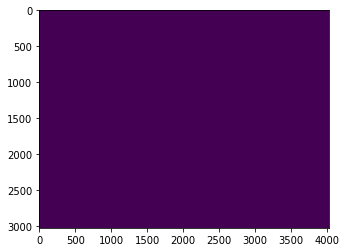

In [ ]:
plt.imshow(ro)